- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in a different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with the imbalanced datasets, so it is recommended that balance out the dataset before creating the decision tree.


# DecisionTreeClassifier

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target variable (species)


In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Converting to DataFrame format

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

In [6]:
print("Dataset preview:")
print(df.head())
print("\nIris species names:", iris.target_names)


Dataset preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Iris species names: ['setosa' 'versicolor' 'virginica']


In [7]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [8]:
print("\nShape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)



Shape of training data (X_train): (105, 4)
Shape of testing data (X_test): (45, 4)
Shape of training labels (y_train): (105,)
Shape of testing labels (y_test): (45,)


In [9]:
# Create a Decision Tree Classifier instance
decision_tree = DecisionTreeClassifier(random_state=42)


In [10]:
print("\nTraining the Decision Tree Classifier...")
decision_tree.fit(X_train, y_train)
print("Training complete.")



Training the Decision Tree Classifier...
Training complete.


In [11]:
# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)


In [12]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)


In [13]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)



Model Evaluation:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



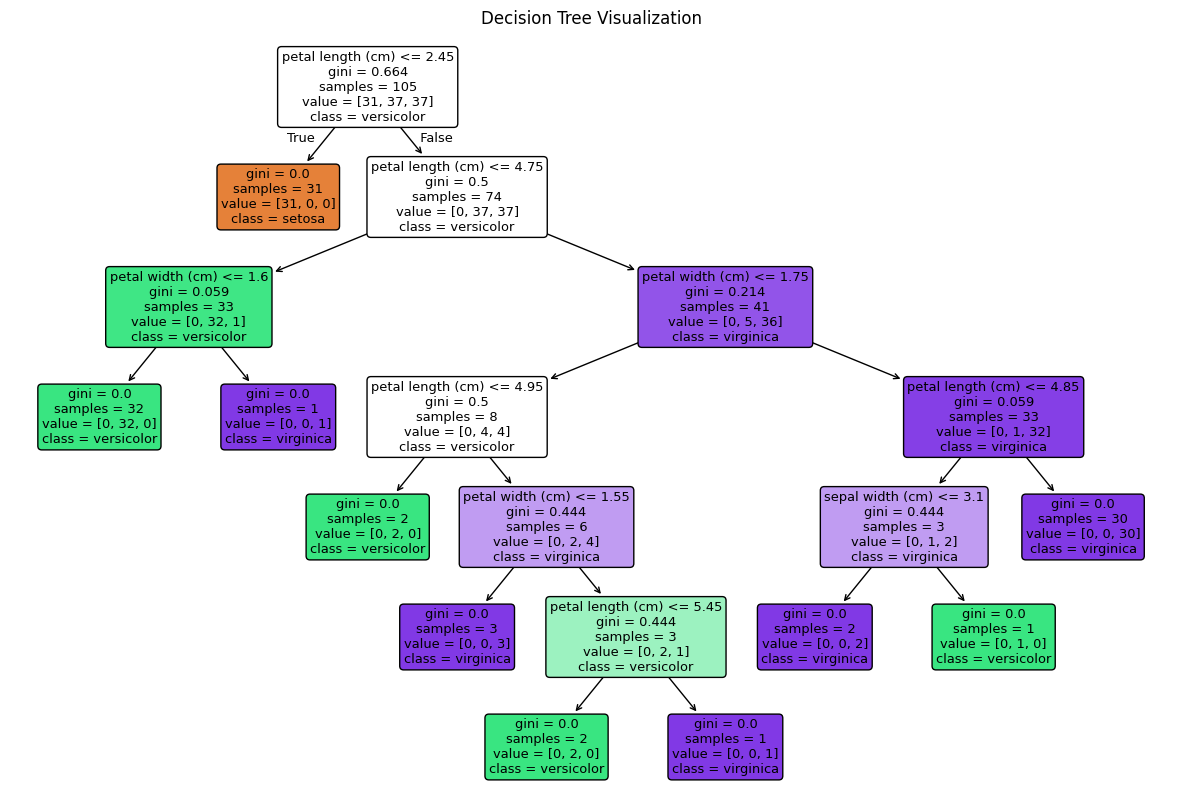

In [14]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

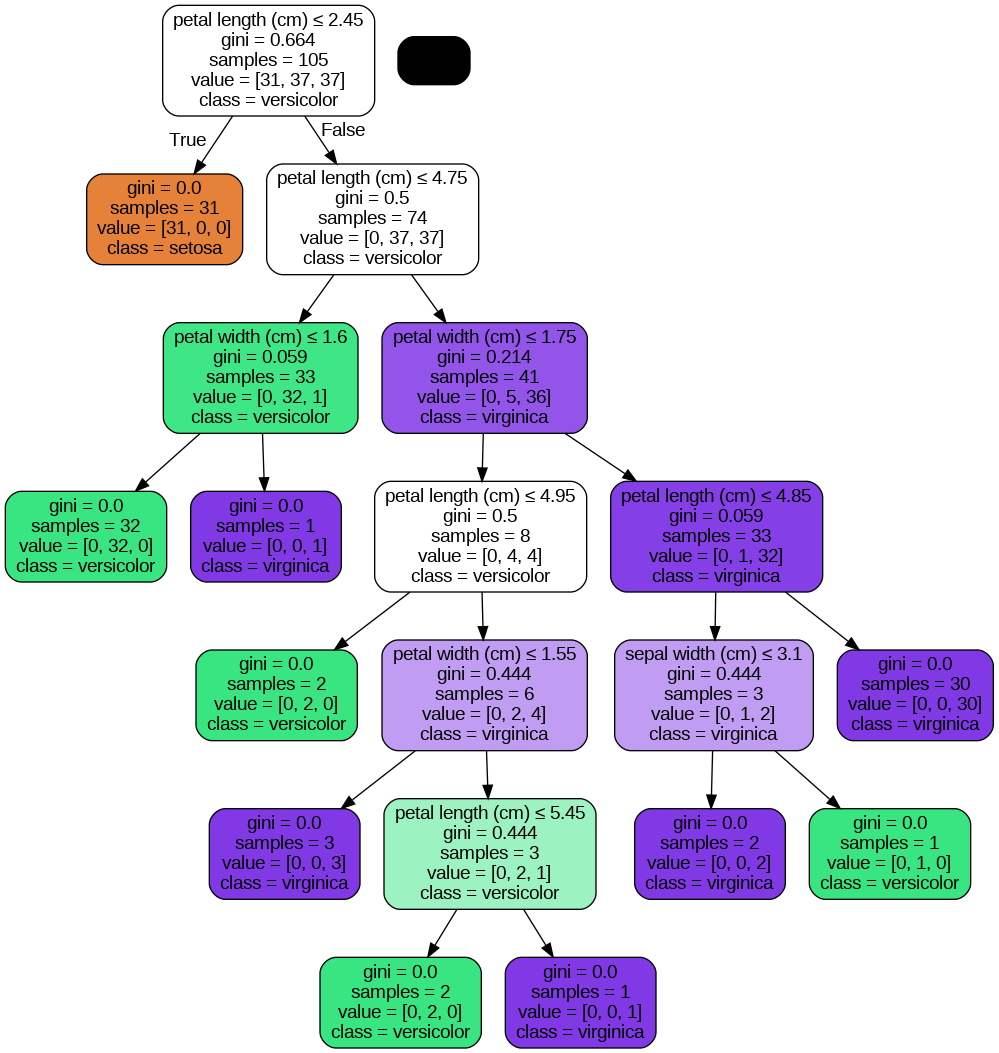

In [15]:
from sklearn.tree import export_graphviz
from io import StringIO # Use io.StringIO instead of sklearn.externals.six
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names=iris.feature_names,
          class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

# Hyperparameter Tuning - Optimizing Decision Tree Performance

- **criterion**: optional (default=**”gini”**) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter**: string, optional (default=” best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are **“best”** to choose the best split and **“random”** to choose the best random split.

- **max_depth**: int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting and the lower value causes underfitting.

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}


In [18]:
# Create a GridSearchCV object
# estimator: The model to tune (DecisionTreeClassifier)
# param_grid: The hyperparameters to search over
# cv: The number of folds for cross-validation (e.g., 5-fold cross-validation)
# scoring: The metric to evaluate the models (e.g., 'accuracy')
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')



In [19]:
# Perform hyperparameter tuning using GridSearchCV on the training data
print("Performing hyperparameter tuning with GridSearchCV...")
grid_search.fit(X_train, y_train)
print("Hyperparameter tuning complete.")

Performing hyperparameter tuning with GridSearchCV...
Hyperparameter tuning complete.


In [20]:
# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("\nBest hyperparameters found:", best_params)


Best hyperparameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [21]:
# Get the best model found by GridSearchCV
best_decision_tree = grid_search.best_estimator_

In [22]:
best_decision_tree

DecisionTreeClassifier(min_samples_split=10, random_state=42)

In [23]:
# Evaluate the best model on the testing data
y_pred_tuned = best_decision_tree.predict(X_test)

In [24]:
# Evaluate the performance of the tuned classifier
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
report_tuned = classification_report(y_test, y_pred_tuned, target_names=iris.target_names)

print("\nModel Evaluation with Tuned Hyperparameters:")
print(f"Accuracy: {accuracy_tuned:.2f}")
print("Classification Report:")
print(report_tuned)


Model Evaluation with Tuned Hyperparameters:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



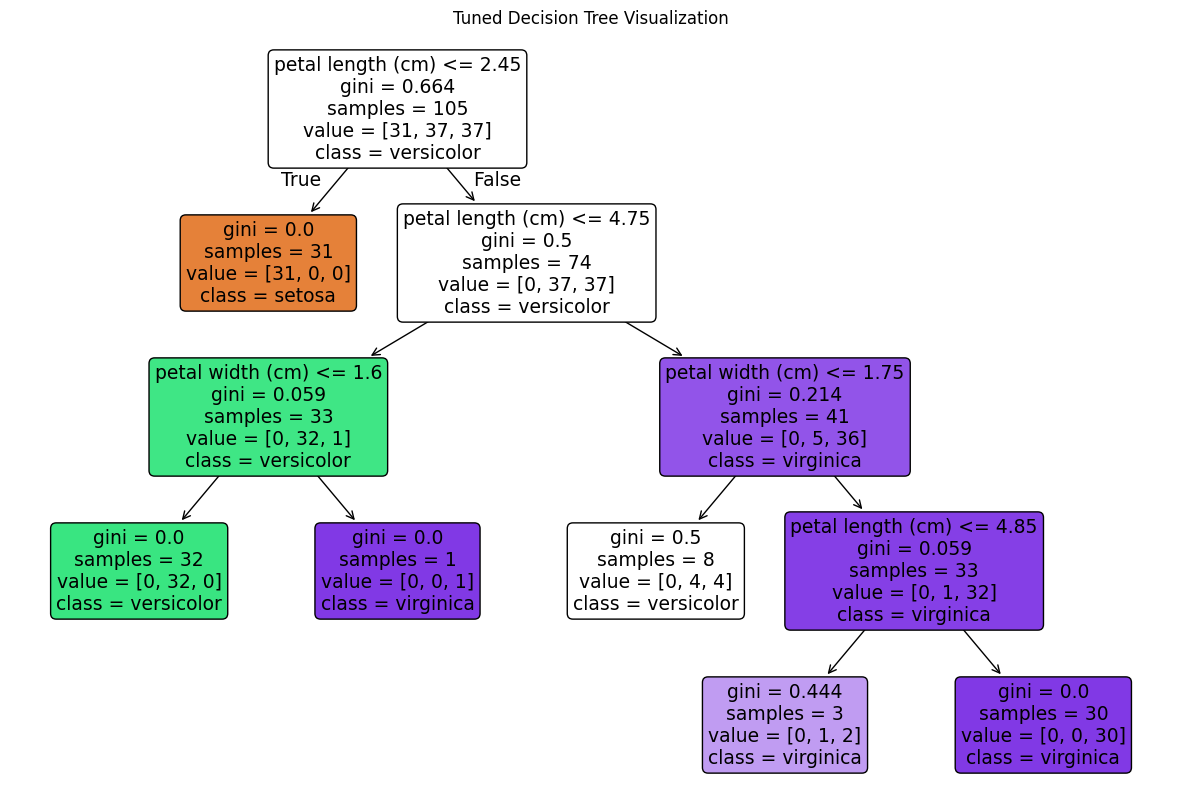

In [25]:
# Visualize the Best Decision Tree (optional)
plt.figure(figsize=(15, 10))
plot_tree(best_decision_tree,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Tuned Decision Tree Visualization")
plt.show()

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target variable (species)

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# 1. Train a Decision Tree with potentially no restrictions (can overfit)
# We set ccp_alpha=0.0 to get the unpruned tree
decision_tree_unpruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0)
decision_tree_unpruned.fit(X_train, y_train)

print("Accuracy on training data (unpruned):", accuracy_score(y_train, decision_tree_unpruned.predict(X_train)))
print("Accuracy on testing data (unpruned):", accuracy_score(y_test, decision_tree_unpruned.predict(X_test)))

Accuracy on training data (unpruned): 1.0
Accuracy on testing data (unpruned): 1.0


In [30]:
# 2. Calculate the cost complexity pruning path
path = decision_tree_unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [31]:
ccp_alphas

array([0.        , 0.00923521, 0.01269841, 0.01269841, 0.01847042,
       0.02705804, 0.25028684, 0.31210884])

In [32]:
impurities

array([0.        , 0.01847042, 0.04386724, 0.05656566, 0.07503608,
       0.10209411, 0.35238095, 0.6644898 ])

In [33]:
# In the following, we'll remove the last element of ccp_alphas as it corresponds to the trivial tree with only one node.
ccp_alphas = ccp_alphas[:-1]


In [34]:
ccp_alphas

array([0.        , 0.00923521, 0.01269841, 0.01269841, 0.01847042,
       0.02705804, 0.25028684])

In [35]:

print(f"\nIdentified {len(ccp_alphas)} effective alphas for pruning.")


Identified 7 effective alphas for pruning.


In [36]:
# 3. Train a decision tree for each effective alpha and evaluate using cross-validation
accuracy_scores = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    # Use 5-fold cross-validation to evaluate the tree with the current alpha
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    accuracy_scores.append(np.mean(scores))

In [37]:
accuracy_scores

[np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9238095238095239),
 np.float64(0.9142857142857144),
 np.float64(0.780952380952381)]

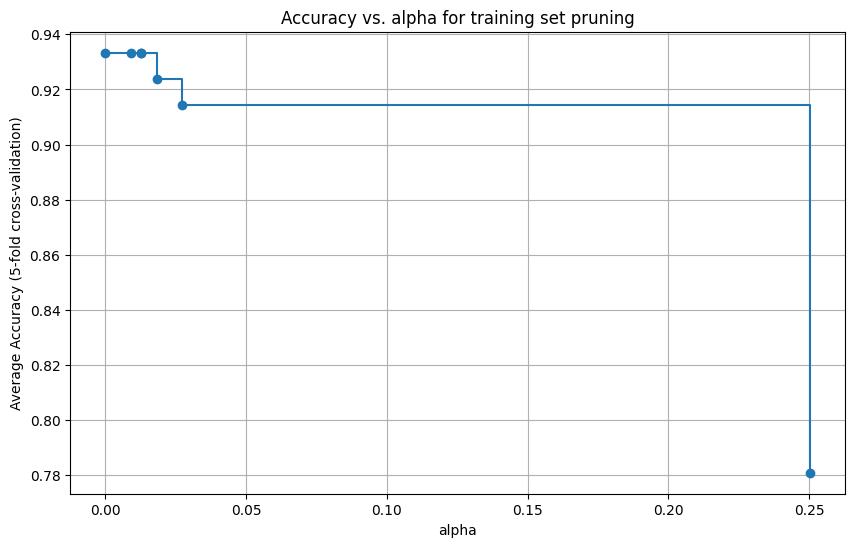

In [38]:
# 4. Plot the relationship between alpha and cross-validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracy_scores, marker='o', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Average Accuracy (5-fold cross-validation)")
plt.title("Accuracy vs. alpha for training set pruning")
plt.grid(True)
plt.show()

In [39]:
# 5. Select the optimal alpha based on cross-validation accuracy
# We choose the alpha that gives the highest cross-validation accuracy
optimal_alpha_index = np.argmax(accuracy_scores)
optimal_ccp_alpha = ccp_alphas[optimal_alpha_index]

print(f"\nOptimal ccp_alpha found through cross-validation: {optimal_ccp_alpha:.4f}")


Optimal ccp_alpha found through cross-validation: 0.0000


In [40]:
# 6. Train the final Decision Tree model with the optimal alpha
decision_tree_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
decision_tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=42)

In [41]:
# 7. Evaluate the pruned model on the testing data
y_pred_pruned = decision_tree_pruned.predict(X_test)

In [42]:
# Evaluate the performance of the pruned classifier
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
report_pruned = classification_report(y_test, y_pred_pruned, target_names=iris.target_names)

print("\nModel Evaluation with Pruning (Optimal alpha):")
print(f"Accuracy: {accuracy_pruned:.2f}")
print("Classification Report:")
print(report_pruned)


Model Evaluation with Pruning (Optimal alpha):
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



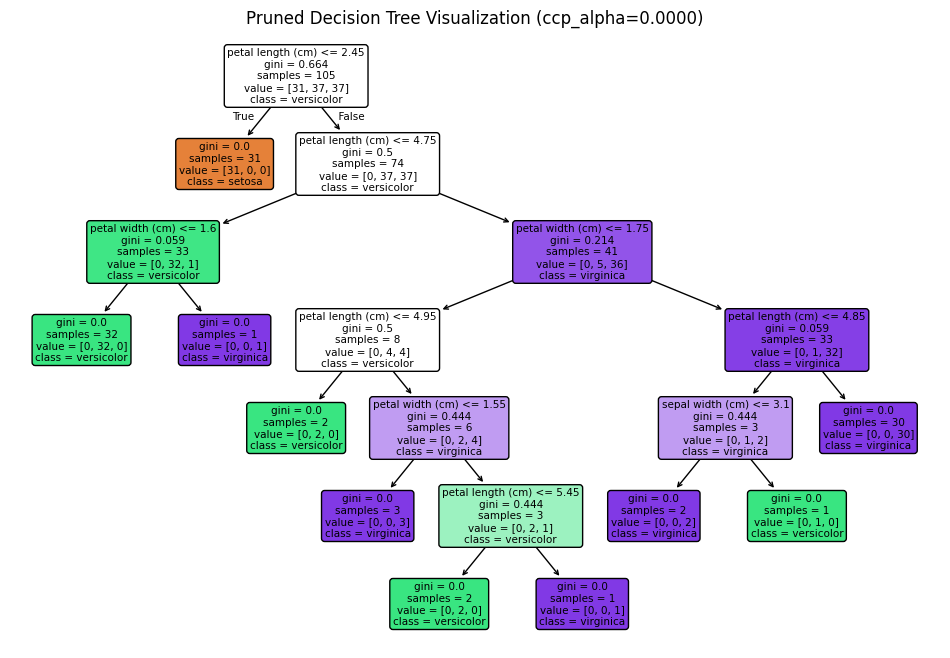

In [43]:
# Visualize the Pruned Decision Tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_pruned,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title(f"Pruned Decision Tree Visualization (ccp_alpha={optimal_ccp_alpha:.4f})")
plt.show()

# Save Model

In [44]:
import joblib # Import joblib for saving and loading models
import os     # Import os to check if file exists


In [45]:
# Define the filename for the saved model
model_filename = 'pruned_decision_tree_model.joblib'


In [46]:
# Save the trained model to a file
print(f"\nSaving the trained model to {model_filename}...")
joblib.dump(decision_tree_pruned, model_filename)
print("Model saved successfully.")


Saving the trained model to pruned_decision_tree_model.joblib...
Model saved successfully.


In [47]:
# --- Load the model from the file and make predictions ---

# Simulate loading the model in a new script or session
print(f"\nLoading the model from {model_filename}...")
if os.path.exists(model_filename):
    loaded_model = joblib.load(model_filename)
    print("Model loaded successfully.")

    new_data = np.array([
        [5.1, 3.5, 1.4, 0.2],
        [6.0, 2.9, 4.5, 1.5],
        [6.7, 3.0, 5.2, 2.3]
    ])

    print("\nMaking predictions on new data:")
    predictions = loaded_model.predict(new_data)

    # Print the predictions and their corresponding class names
    predicted_species = [iris.target_names[p] for p in predictions]
    for i, data_point in enumerate(new_data):
        print(f"Data: {data_point}, Predicted Species: {predicted_species[i]}")

else:
    print(f"Error: Model file '{model_filename}' not found.")




Loading the model from pruned_decision_tree_model.joblib...
Model loaded successfully.

Making predictions on new data:
Data: [5.1 3.5 1.4 0.2], Predicted Species: setosa
Data: [6.  2.9 4.5 1.5], Predicted Species: versicolor
Data: [6.7 3.  5.2 2.3], Predicted Species: virginica


# SHAP - SHapley Additive exPlanations

- SHAP (SHapley Additive exPlanations) is a powerful framework for interpreting the predictions of machine learning models.

- While not a validation *metric* in the traditional sense (like accuracy or precision), SHAP plays a crucial role in **model validation by providing insights into *why* a model makes certain predictions**, helping to build trust in the model and identify potential issues.

- Essentially, SHAP values attribute the contribution of each feature to the difference between the actual prediction and the average prediction.

- Based on cooperative game theory, SHAP values fairly distribute the "payout" (the difference in prediction) among the "players" (the features).

## **How SHAP is Used for Model Validation:**


SHAP validation is less about quantifying overall performance and more about **understanding, trusting, and debugging the model's decision-making process.** It helps answer the critical question: **"Does the model arrive at predictions in a way that makes sense and is reliable?"**

Here are several ways SHAP can be used for validating your Decision Tree (or any other) model:

1.  **Understanding Global Feature Importance by SHAP Summary Plot:**
    * SHAP can provide a global view of **which features are most important to the model's predictions across the entire dataset**. This is often visualized using a **SHAP summary plot**.
    * **Validation Aspect:** Does this global feature importance align with your domain knowledge? If a feature you know is **critical for the problem has a low SHAP importance, it might indicate an issue with the data, feature engineering**, or the model itself. Conversely, if an **irrelevant feature has high importance, it's a red flag**.

2.  **Examining Local Predictions (Explaining Individual Instances) by Force Plot or Waterfall plot:**
    * SHAP can explain **why a model made a specific prediction for a single data** point. This is shown through SHAP force plots or waterfall plots.
    * **Validation Aspect:**
        * **Debugging Errors:** For instances where your model made an incorrect prediction (e.g., a false positive or false negative), you can use SHAP to understand which features pushed the prediction in the wrong direction. This can reveal patterns in errors or highlight problematic data points.
        * **Building Trust:** For critical decisions made by the model, you can use SHAP to explain the reasoning to stakeholders, building confidence in the model's outputs. This is especially important in regulated industries.

3.  **Identifying and Mitigating Bias:**
    * SHAP can help **uncover if the model is relying unfairly on sensitive attributes** (like race, gender, or zip code) when making predictions, even if those features aren't explicitly used in a discriminatory way by the algorithm itself.
    * **Validation Aspect:** By examining SHAP values across different demographic groups or for features that might introduce bias, you can assess if the model's predictions are being unduly influenced by these factors. This is a critical step in **ensuring fairness and ethical AI**.

4.  **Understanding Feature Interactions:**
    * SHAP values can **reveal how features interact with each other to influence predictions**.
    * **Validation Aspect:** Do the identified interactions make sense from a business or domain perspective? Unexpected or illogical interactions might point to complex relationships in the data that the model is capturing, or potentially to data quality issues.

5.  **Comparing Models:**
    * When comparing different models (e.g., a Decision Tree vs. a Random Forest vs. a Neural Network), you can use SHAP **to understand *how* each model is using the features**.
    * **Validation Aspect:** This helps in selecting a model that not only performs well but also has a desirable and interpretable decision-making process. A simpler model with understandable SHAP values might be preferred over a black-box model with similar performance if explainability is a key requirement.

6.  **Ensuring Robustness Across Data Subsets:**
    * You can analyze SHAP values on different subsets of your data (e.g., data from different time periods, different user segments) **to see if the model's feature importance and decision-making remain consistent**.
    * **Validation Aspect:** Significant shifts in feature importance or prediction explanations across subsets **could indicate issues with model generalization or concept drift** (when the relationship between features and the target changes over time).

## **SHAP and Decision Trees:**

- Decision Trees are generally considered more interpretable than many other machine learning models because their structure directly represents decision rules.

- However, even with Decision Trees, especially deep or complex ones, understanding the cumulative impact of features can be challenging.

- SHAP provides a unified framework to explain predictions regardless of the model complexity.

- For a Decision Tree, SHAP values can attribute the prediction contribution back to the individual feature splits along the decision path.

**In summary, SHAP validation is not a single metric but rather a process of using SHAP values to:**

* Gain confidence in your model by verifying its logic.
* Identify potential biases or unexpected behavior.
* Debug model errors by understanding the reasons behind incorrect predictions.
* Communicate model decisions effectively.

It's a crucial part of a comprehensive model validation strategy, especially in production where trust and explainability are paramount. It complements traditional validation metrics by providing a deeper understanding of the model's internal workings.

# SHAP Implementation

In [2]:
pip install shap


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: shap in c:\users\shanthi\anaconda3\lib\site-packages (0.47.2)



In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import joblib
import os
import shap # Import the shap library


In [4]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target # Target variable (species)


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [6]:
# Calculate the cost complexity pruning path
decision_tree_unpruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0)
decision_tree_unpruned.fit(X_train, y_train)
path = decision_tree_unpruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1] # Remove the last alpha

accuracy_scores = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    accuracy_scores.append(np.mean(scores))

optimal_alpha_index = np.argmax(accuracy_scores)
optimal_ccp_alpha = ccp_alphas[optimal_alpha_index]

decision_tree_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)
decision_tree_pruned.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
# Create a SHAP TreeExplainer for the trained Decision Tree model
# TreeExplainer is optimized for tree-based models
explainer = shap.TreeExplainer(decision_tree_pruned)


In [8]:
# Calculate SHAP values for the test dataset to understand model behavior on unseen data
shap_values = explainer.shap_values(X_test)

In [9]:
shap_values

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.0031746 ,  0.0031746 ],
        [-0.2952381 ,  0.60429293, -0.30905483],
        [ 0.        ,  0.04650072, -0.04650072]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.00634921, -0.00634921],
        [ 0.7047619 , -0.38531746, -0.31944444],
        [ 0.        ,  0.0265873 , -0.0265873 ]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.00514671,  0.00514671],
        [-0.2952381 , -0.17657528,  0.47181337],
        [ 0.        , -0.17065897,  0.17065897]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.0031746 ,  0.0031746 ],
        [-0.2952381 ,  0.60429293, -0.30905483],
        [ 0.        ,  0.04650072, -0.04650072]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -0.04789005,  0.04789005],
        [-0.2952381 ,  0.30643631, -0.01119822],
        [ 0.        ,  0.38907278, -0.38907278]],

       [[ 


Generating SHAP Summary Plot...


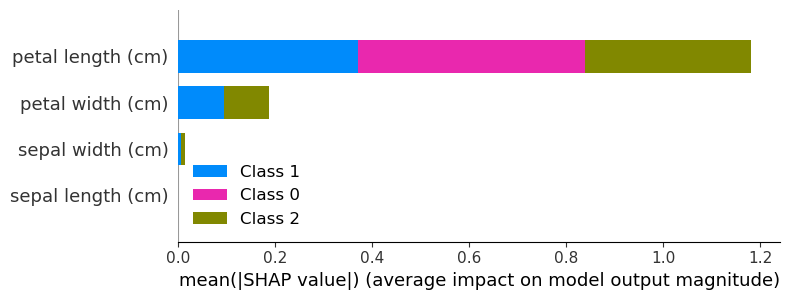

<Figure size 640x480 with 0 Axes>

In [10]:
# --- SHAP Visualizations ---

# 1. SHAP Summary Plot (Global Feature Importance)
# This plot shows the importance of each feature across all instances
# and the distribution of their impact on the prediction.
print("\nGenerating SHAP Summary Plot...")
# For multi-class, you often look at the SHAP values for a specific class,
# or the average absolute SHAP values across classes.
# Let's plot for the first class (setosa) as an example, or use the absolute values for overall importance.
# shap.summary_plot(shap_values[0], X_test, feature_names=iris.feature_names, plot_type="dot") # for a specific class
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names, plot_type="bar") # average absolute SHAP values (overall importance)
plt.suptitle("SHAP Feature Importance (Average Absolute SHAP Value)", y=1.02) # Add a title
plt.show()


- Petal length (cm) has impact on all three classes
- petal width (cm) has average impact across the classes, though less than petal length.

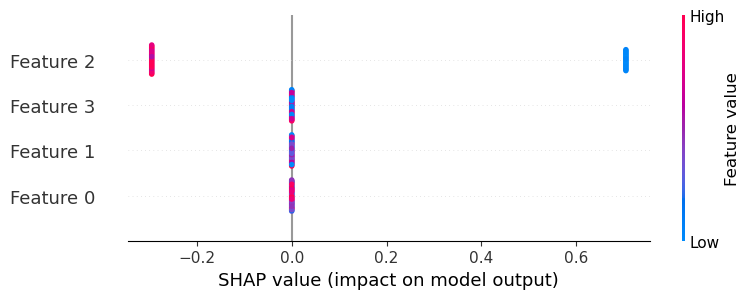

In [11]:
shap.summary_plot(shap_values[:,:,0], X_test)

- FEature 2 - petal length has a significant impact on the model's output for Class 0.
- High petal length values decrease the model's output for Class 0, making it less likely to be predicted as Class 0.
- Low petal length values increase the model's output for Class 0, making it more likely to be predicted as Class 0.

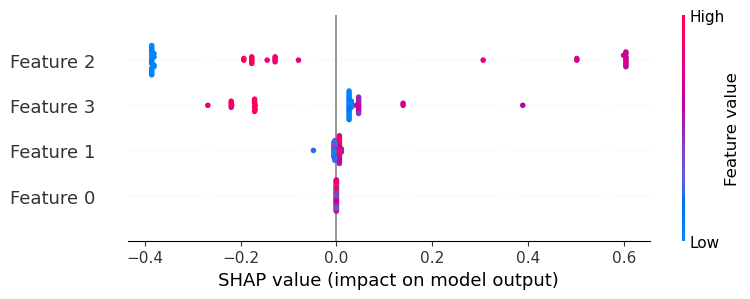

In [12]:
shap.summary_plot(shap_values[:,:,1], X_test)

- Petal length (Feature 2) and petal width (Feature 3) seem to be the most influential features in model — especially petal length.
- Low petal length values decrease the model's output for Class 1, making it less likely to be predicted as Class 1
- High petal length values increase the model's output for Class 1, making it more likely to be predicted as Class 1

- High Petal width values decrease the model's output for Class 1



In [13]:
shap_values[0]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        , -0.0031746 ,  0.0031746 ],
       [-0.2952381 ,  0.60429293, -0.30905483],
       [ 0.        ,  0.04650072, -0.04650072]])

In [14]:
shap_values[:,:,1]

array([[ 0.        , -0.0031746 ,  0.60429293,  0.04650072],
       [ 0.        ,  0.00634921, -0.38531746,  0.0265873 ],
       [ 0.        , -0.00514671, -0.17657528, -0.17065897],
       [ 0.        , -0.0031746 ,  0.60429293,  0.04650072],
       [ 0.        , -0.04789005,  0.30643631,  0.38907278],
       [ 0.        ,  0.00634921, -0.38531746,  0.0265873 ],
       [ 0.        , -0.0031746 ,  0.60429293,  0.04650072],
       [ 0.        , -0.00514671, -0.12779479, -0.21943946],
       [ 0.        , -0.0031746 ,  0.60429293,  0.04650072],
       [ 0.        , -0.0031746 ,  0.60429293,  0.04650072],
       [ 0.        ,  0.01029341, -0.14438931, -0.21828506],
       [ 0.        , -0.0031746 , -0.38055556,  0.03134921],
       [ 0.        ,  0.00634921, -0.38531746,  0.0265873 ],
       [ 0.        , -0.0031746 , -0.38055556,  0.03134921],
       [ 0.        ,  0.00634921, -0.38531746,  0.0265873 ],
       [ 0.        ,  0.00634921,  0.50191198,  0.13935786],
       [ 0.        , -0.

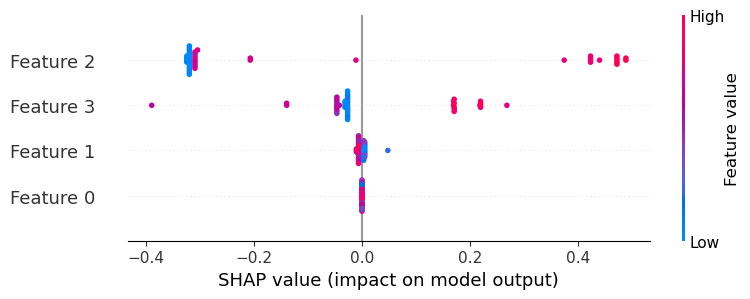

In [15]:
shap.summary_plot(shap_values[:,:,2], X_test)

- Low and Medium Feature 2: petal length values decrease the model's output for class 2. 
- High Feature 2: petal length values increase the model's output for class 2. 

- Medium and Low Feature 3: petal width values decrease the model's output for class 2
- High Feature 3: petal width values increase the model's output for class 2.


Generating SHAP Beeswarm Plot...


<Figure size 640x480 with 0 Axes>

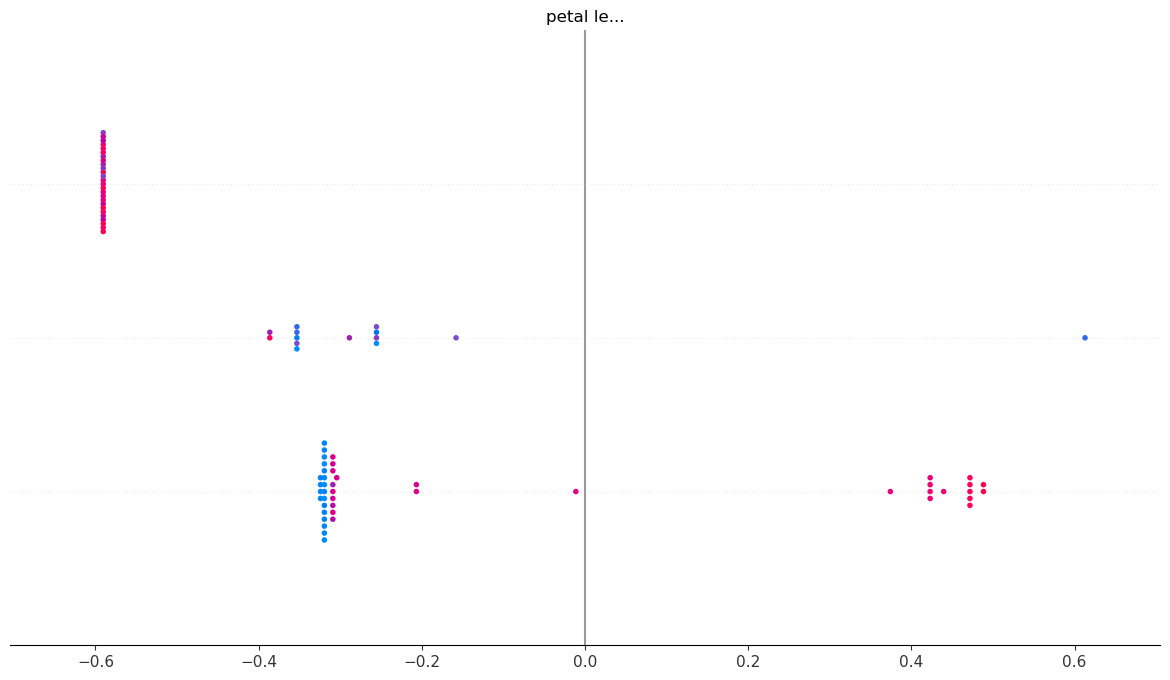

<Figure size 640x480 with 0 Axes>

In [16]:
# To see the distribution of impact for each feature (beeswarm plot), use:
print("\nGenerating SHAP Beeswarm Plot...")
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names)
plt.suptitle("SHAP Beeswarm Plot", y=1.02) # Add a title
plt.show()


<Figure size 640x480 with 0 Axes>

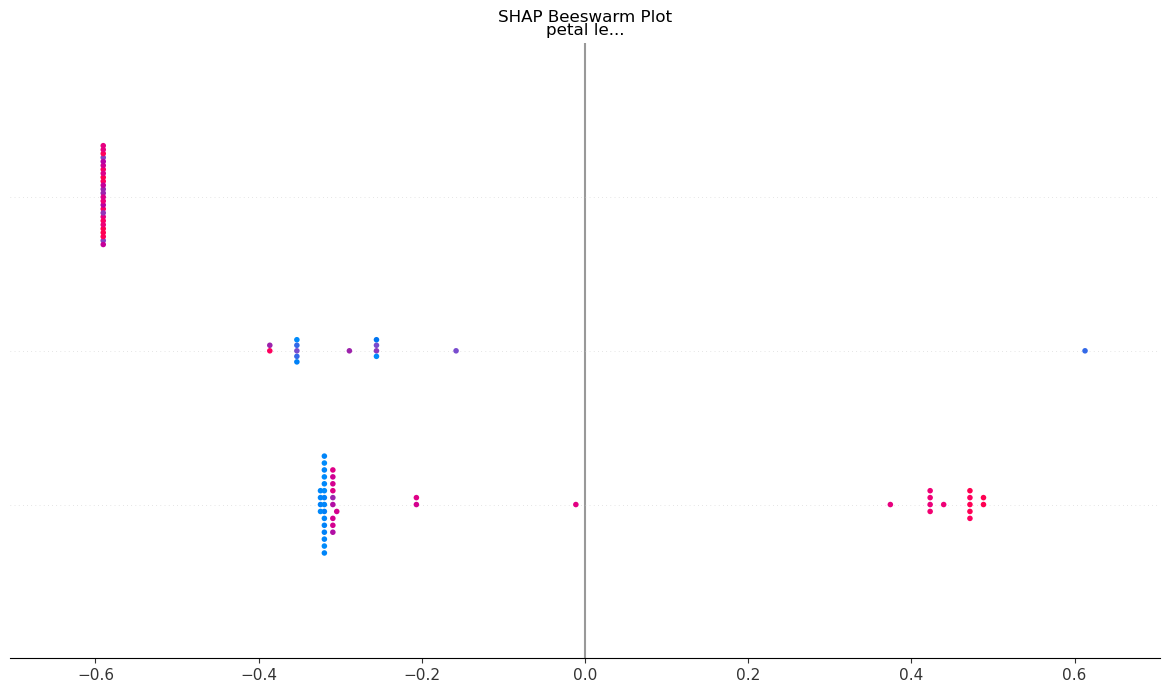

In [17]:
shap.summary_plot(shap_values, X_test, feature_names=iris.feature_names, show=False)

# Add a title
plt.suptitle("SHAP Beeswarm Plot", y=1.02)

# Show the plot
plt.show()


In [18]:
feature_index = iris.feature_names.index("petal length (cm)")
feature_index

2

In [19]:

shap_values[:, :, 0]

array([[ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       ,  0.7047619,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       ,  0.7047619,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       ,  0.7047619,  0.       ],
       [ 0.       ,  0.       ,  0.7047619,  0.       ],
       [ 0.       ,  0.       ,  0.7047619,  0.       ],
       [ 0.       ,  0.       ,  0.7047619,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       , -0.2952381,  0.       ],
       [ 0.       ,  0.       ,


Generating SHAP Dependence Plots...


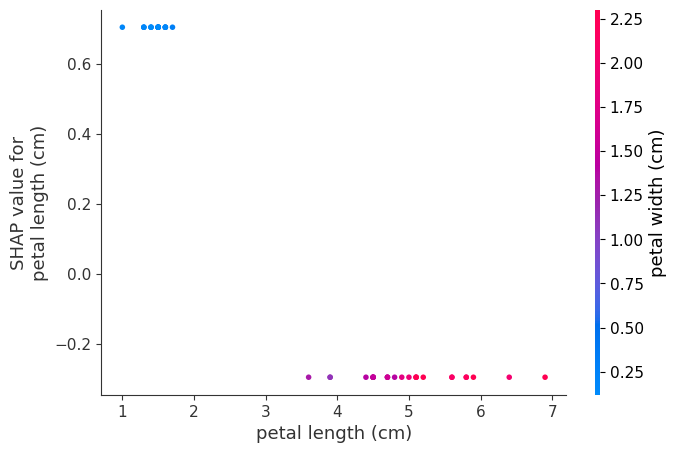

<Figure size 640x480 with 0 Axes>

In [20]:
# 2. SHAP Dependence Plots (Effect of a Single Feature)
# These plots show how the value of a single feature impacts the prediction,
# often colored by another feature to show interactions.
print("\nGenerating SHAP Dependence Plots...")
# Let's plot dependence for 'petal length (cm)' and color by 'petal width (cm)'

# shap_values needs to be indexed to select the values for a particular class
# In a multi-class scenario, shap_values is a list of arrays, one for each class
# For example, for class 0:
shap_values_for_class_0 = shap_values[:, :, 0] # Correct indexing for 3D array

shap.dependence_plot(
    "petal length (cm)",
    shap_values_for_class_0, # Selecting SHAP values for class 0
    X_test,
    feature_names=iris.feature_names,
    interaction_index="petal width (cm)"
)

plt.suptitle("SHAP Dependence Plot: Petal Length vs. SHAP for Setosa", y=1.02) # Add a title
plt.show()


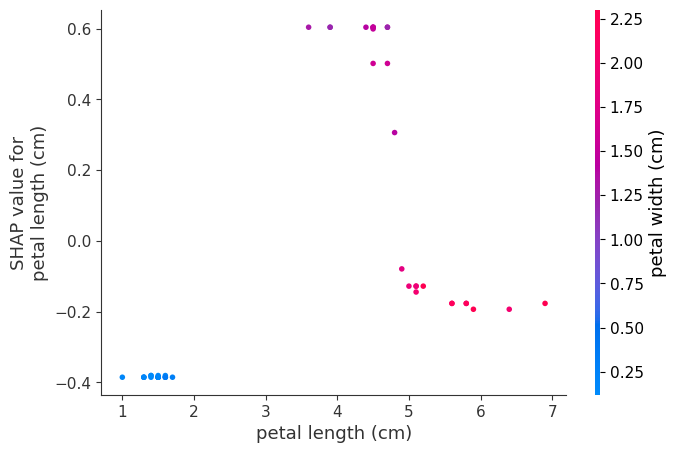

<Figure size 640x480 with 0 Axes>

In [21]:
shap_values_for_class_1 = shap_values[:, :, 1]


shap.dependence_plot(
    "petal length (cm)",
    shap_values_for_class_1, # Selecting SHAP values for class 1
    X_test,
    feature_names=iris.feature_names,
    interaction_index="petal width (cm)"
)

plt.suptitle("SHAP Dependence Plot: Petal Length vs. SHAP for Setosa", y=1.02) # Add a title
plt.show()

c:\Users\shanthi\anaconda3\Lib\site-packages\shap\plots\_force_matplotlib.py:107: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


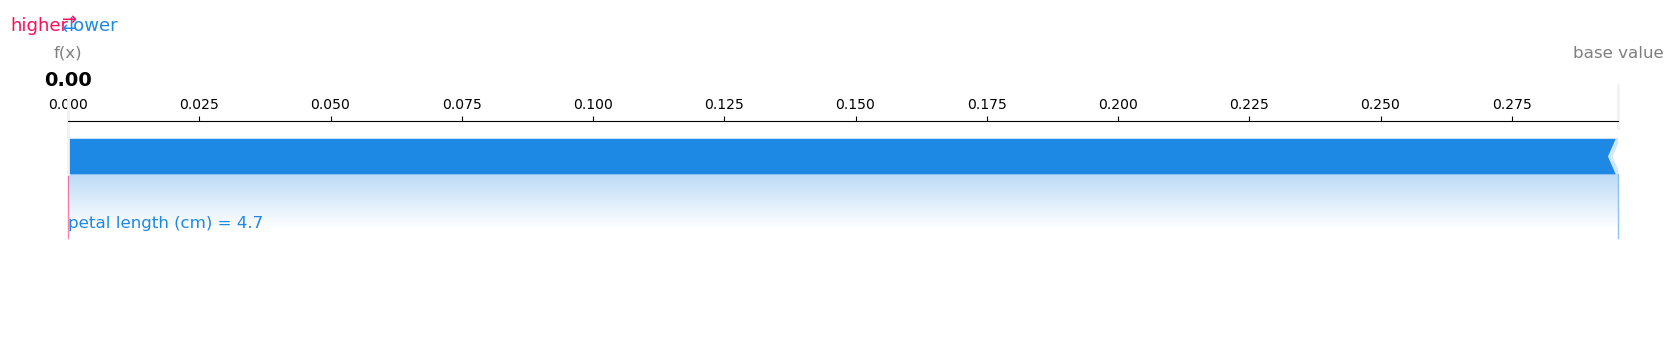

In [22]:

shap.initjs()
shap.plots.force(explainer.expected_value[0], shap_values[0, :, 0], X_test[0,:], feature_names=iris.feature_names, matplotlib = True)
#plt.show()


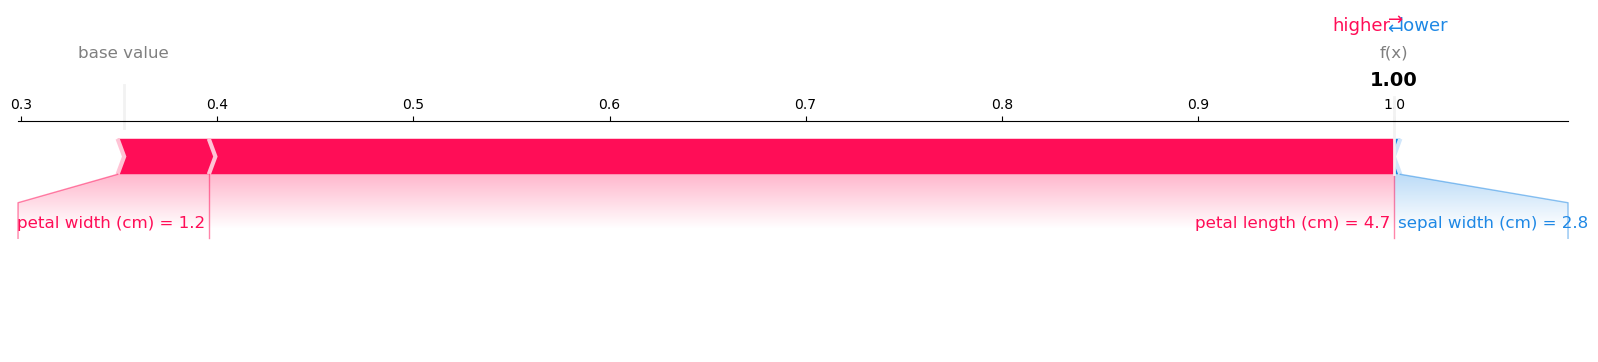

In [23]:

shap.initjs()
shap.plots.force(explainer.expected_value[1], shap_values[0, :, 1], X_test[0,:], feature_names=iris.feature_names, matplotlib = True)
#plt.show()


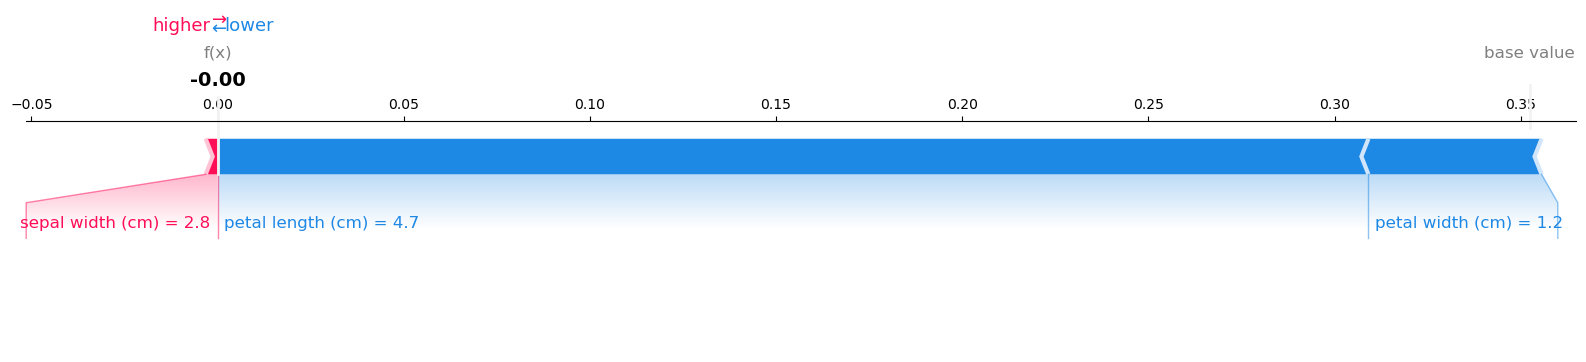

In [24]:

shap.initjs()
shap.plots.force(explainer.expected_value[2], shap_values[0, :, 2], X_test[0,:], feature_names=iris.feature_names, matplotlib = True)
#plt.show()


# Reference



- https://machinelearninggeek.com/decision-tree-classification-in-python/